In [7]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

In [13]:
runs_clusters10 = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["bp_prop_clustersize", "margin", "kmeans",10, 30, 0.01, "Adam"])
print(len(runs_clusters10))
run_ids_clusters10 = get_run_ids(runs_clusters10)

10


In [9]:
runs_clusters1000 = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.number_clusters"],[True, True, True, True, True, True],["bp_prop_clustersize", "margin", "kmeans", 30, 0.01, 1000])
print(len(runs_clusters1000))
run_ids_clusters1000 = get_run_ids(runs_clusters1000)

10


In [14]:
samples_labeled_clusters10, avg_accs_clusters10 = get_labeledSamples_avgAcc(run_ids_clusters10, tracking)
samples_labeled_clusters1000, avg_accs_clusters1000 = get_labeledSamples_avgAcc(run_ids_clusters1000, tracking)

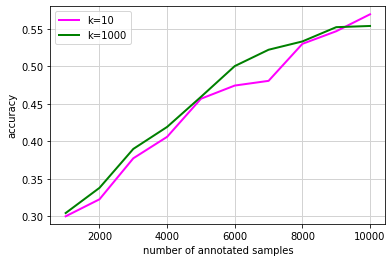

In [15]:
# plot
plt.plot(samples_labeled_clusters10, avg_accs_clusters10,color='magenta', label='k=10', linewidth=2)
plt.plot(samples_labeled_clusters1000, avg_accs_clusters1000,color='green', label='k=1000', linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [6]:
print(f'boundary: {avg_accs_clusters1000}')

boundary: [0.30434 0.33795 0.38986 0.41921 0.45929 0.50035 0.52214 0.53323 0.55225
 0.55385]


In [12]:
print(f'boundary: {avg_accs_clusters10}') #alt bp_prop_clustersize

boundary: [0.30011  0.32007  0.384645 0.407265 0.4505   0.473545 0.497325 0.52462
 0.548825 0.5639  ]


In [16]:
print(f'boundary: {avg_accs_clusters10}') #neu bp_prop_clustersize

boundary: [0.30001 0.32268 0.37737 0.406   0.45679 0.47438 0.48065 0.53001 0.54681
 0.56941]
